# Module 3 Assessment

### Congratulations on making it to your third assessment! Just a few reminders before you continue:
- This should only take two hours, so be sure to manage your time effectively.
- Use any libraries you want to solve the problems in the assessment.
- Read the instructions carefully for _specified variable names_.
- Check your progress by running **`make tests`** in the terminal, </br>
  OR **if you have a PC**, manually run these lines in the terminal:
  - `jupyter nbconvert --to script mod3_assessment.ipynb`
  - `python -m pytest --disable-pytest-warnings -v`

The sections of the assessment are:
- Combinatorics, Probability and Discrete Distributions
- Statistical Distributions
- Statistical Tests
- Bayesian Statistics

In [1]:
# __SOLUTION__ 
import math
import pickle
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.stats import weightstats as stests

## Part 1: Combinatorics, Probability & Discrete Distributions

### a. Set Theory

Given the following event probabilities:

$P(A) = 0.7$

$P(B) = 0.5$

$P(B|A) = 0.4$

Calculate the following probabilities and assign to the variables `ans1` and `ans2` in the next cell:

1. $P(A and B)$

2. $P(A|B)$

Hint: draw a diagram!


In [2]:
# __SOLUTION__ 

# Question 1: P(A and B)
# We can use the conditional probability formula
# P(B|A)   = P(A & B)/P(A)
# P(A & B) = P(B|A)*P(A) 
#          = 0.4*0.7
ans1 = 0.28

# Question 2: P(A|B) 
#    = P(A and B)/P(B) 
#    = 0.28/0.5 
ans2 = 0.56

### b. Card Combinatorics

You have a standard deck of 52 cards.

1. What is the probability of drawing a king or a queen? (`ans3`)
2. How many possible 5-card combinations can be formed with this deck of 52 cards? (`ans4`)


In [3]:
# __SOLUTION__ 

# Question 1: P(King or Queen)
#    = Number of Kings + Queens / Total Number of Cards 
#    = 8/52 
ans3 = 2/13

# Question 2: Number of 5-card combinations 
#    = Number of ways to choose 5 from 52 
#    = 52!/(5!*47!) 
ans4 = 2598960

### c. Discrete Probability Distributions

In a game with the same deck of 52 cards, you draw a card $n$ times with replacement. You win a point by drawing a face card (king, queen or jack). 

The function ```probability_of_scoring``` is provided below.  In this function $k$ is the number of points won in the game, $n$ is the number of draws, and $p$ is the probability of winning a point.  The function returns the corresponding probability.

In [4]:
def probability_of_scoring_k(n, p, k):
    """
    n = number of draws
    p = probability of winning a point
    k = number of points scored
    
    Use np.factorial()
    
    """
    # defining a helper function for factorial
    
    def fact(n):
        return np.math.factorial(n)
    
    
    return (fact(n)/(fact(k)*fact(n-k)))*(p**(k))*((1-p)**(n-k))

1. Using this function, what is the probability of winning 8 points out of 22 draws?


In [5]:
# __SOLUTION__ 
ans5 = probability_of_scoring_k(22, 3/13, 8)
ans5

0.06532117736042573

2a. Use the function `probability_of_scoring` to calculate the probability of drawing $k$ points out of 22 draws.<br> _Hint_: Your final result should be in the form of a list or array.

In [6]:
# __SOLUTION__ 
k_values = range(22)
probs = [probability_of_scoring_k(22, 3/13, i) for i in k_values]

2b. Plot the results of 2a. to create the probability mass function.


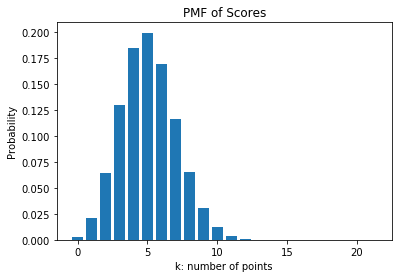

In [7]:
# __SOLUTION__ 
plt.bar(k_values, probs)
plt.title('PMF of Scores')
plt.xlabel('k: number of points')
plt.ylabel('Probability')
plt.show()

3. Based on the probability mass function, what type of distribution does the `probability_of_scoring` have?

In [8]:
# __SOLUTION__
"""
The distribution above is a binomial distribution
"""
dist_type = "Binomial Distribution"

## Part 2: Statistical Distributions

### a. Descriptive Statistics

We have a sample of $10,000$ checks from a TexMex restaurant that has saved all their check receipts since openning.<br> We have the sample in the file ```check_data```.

1.  Compute the descriptive statistics of check totals and set it equal to the `desc_check_total` variable.

In [9]:
# __SOLUTION__
data = pd.read_csv('data/check_data.csv')
desc_check_total = data.check_total.describe()
desc_check_total

count    2000.000000
mean       22.020174
std         2.775966
min        13.650530
25%        19.963402
50%        22.019761
75%        24.072823
max        29.884671
Name: check_total, dtype: float64

2. What do the measures of central tendency (mean and median) indicate about the distribution of the check totals?

In [10]:
# __SOLUTION__ 
"""
The mean and the median are approximately the same at 22.02 
which indicates that the distribution of checks is normal
"""

'\nThe mean and the median are approximately the same at 22.02 \nwhich indicates that the distribution of checks is normal\n'

### b. Continuous Distributions

1. Create a histogram to visually depict the distribution of check totals.

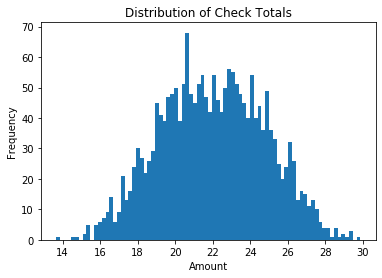

In [11]:
# __SOLUTION__ 
plt.title('Distribution of Check Totals')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.hist(data['check_total'], bins=80)
plt.show()

For the following questions, you may use a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf).

2. Calculate the 95% confidence interval around the mean check total as a **tuple** and set it to the variable `conf`. In a separate cell, interpret this interval correctly. 

In [12]:
# __SOLUTION__ 
# 95% confidence interval has z-score of 1.96 (read where p = 0.975)
mean = data.check_total.mean()
zscore = 1.96
std = np.std(data['check_total'])
conf = (mean - zscore*std, mean + zscore*std)
print("The 95% confidence interval is {} with a mean of {}".format(conf, mean))

The 95% confidence interval is (16.58064003673802, 27.459707079674754) with a mean of 22.020173558206388


In [13]:
# __SOLUTION__
"""
We can be 95% sure that the true value of the population mean for check totals 
is between $16.58 and $27.46
"""

'\nWe can be 95% sure that the true value of the population mean for check totals \nis between $16.58 and $27.46\n'

3. Using a z-test and an $\alpha = 0.05$, is my $23 dollar check significantly **greater** than the mean in our sample? 
- Set the `ztest_results` variable to the results of the ztest function.
- Set your decision to the `significant` variable. 
- Then elaborate on why you made this decision.

In [14]:
# __SOLUTION__
ztest_results = stests.ztest(data['check_total'], value=23)
significant = True # Set this to True or False

In [15]:
# __SOLUTION__

"""
A check total with a value of 23 is significantly different than the mean in our sample.  

We can tell this because the observed z-score of -15.78 is more extreme than the critical z-score of -1.64.

OR

We can tell this because the p value is well below the alpha value of 0.05.

"""

'\nA check total with a value of 23 is significantly different than the mean in our sample.  \n\nWe can tell this because the observed z-score of -15.78 is more extreme than the critical z-score of -1.64.\n\nOR\n\nWe can tell this because the p value is well below the alpha value of 0.05.\n\n'

4. Say we don't know how our population of checks is distributed. How does **sampling** and the **Central Limit Theorem** allow us to **make inferences on the population mean**, i.e. estimate $\mu, \sigma$ of the population mean?

In [16]:
# __SOLUTION__
"""
Solution: The Central Limit Theorem says that we can take repeated samples of the population, 
and estimate population parameters by finding the average mean and standard deviation of the samples. 
Sample means will also tend to a normal distribution.
"""

'\nSolution: The Central Limit Theorem says that we can take repeated samples of the population, \nand estimate population parameters by finding the average mean and standard deviation of the samples. \nSample means will also tend to a normal distribution.\n'

## Part 3: Statistical Testing

### Hypotheses and Errors

This TexMex restaurant recently added queso to its menu.<br>The restaurant owners hope that customers ordering queso will end up spending a significantly different amount than non-queso-orders.<br> Let the average amount on queso customers' checks be $X_{Q}$.

1. Set up the null and alternative hypotheses for this test.

$H_{0}:$ `hypothesis here`

$H_{A}:$ `hypothesis here`

2. In this context, what does it mean to make `Type I` and `Type II` errors?

In [17]:
# __SOLUTION__
"""
Type I: saying queso customers are different when they are the same

Type II: saying queso customers are the same when they are different
"""

'\nType I: saying queso customers are different when they are the same\n\nType II: saying queso customers are the same when they are different\n'

With $\alpha = 0.05$, we want to determine if checks which included queso are significantly more **or** less than those that did not include queso. Below are histograms of the distribution of check totals split by orders that included queso and those that did not.  You may assume they have equal variances.

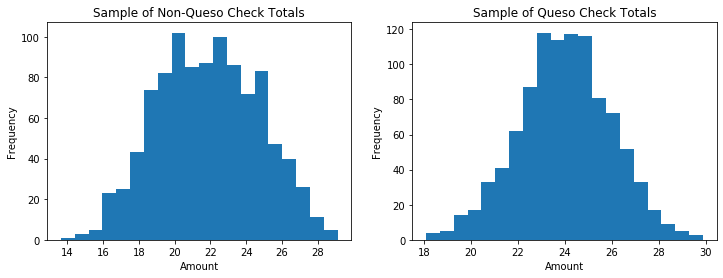

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

np.random.seed(43)
no_queso = np.random.choice(data.check_total, 1000)
ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

queso = pickle.load(open("data/queso.pkl", "rb"))
ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

3. Run a statistical test on the two samples to determine if you should reject or fail to reject the null hypothesis above. 

In [19]:
# __SOLUTION__ 
queso_results = stats.ttest_ind(no_queso, queso)

4.  According to the results of the statistical test above
- Set the `reject` variable to your decision 
- Then elaborate on why you made this decision regarding your null hypothesis.

In [20]:
# __SOLUTION__
# Set this to True or False
reject = True 
"""
We reject the null hypothesis because the p-value is less than 0.05
"""

'\nWe reject the null hypothesis because the p-value is less than 0.05\n'

5. What are the conditions required to perform the test you chose?

In [21]:
# __SOLUTION__
"""
Conditions for a two tailed t-test:

data is continuous
data follow a normal distribution
variance of the two populations are equal
two samples are independent
both samples are random samples
"""

'\nConditions for a two tailed t-test:\n\ndata is continuous\ndata follow a normal distribution\nvariance of the two populations are equal\ntwo samples are independent\nboth samples are random samples\n'

## Part 4: Bayesian Statistics
### a. Bayes' Theorem

#### Scenario
Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the **pet store** or the **pound**.<br> 
The probability of him going to the _pet store_ is $0.2$. 

He can choose to get either a **big**, **medium** or **small** puppy.

If he goes to the _pet store_:
- the probability of him getting a small puppy is $0.6$ 
- the probability of him getting a medium puppy is $0.3$
- the probability of him getting a large puppy is $0.1$

If he goes to the _pound_: 
- the probability of him getting a small puppy is $0.1$
- the probability of him getting a medium puppy is $0.35$
- the probability of him getting a large puppy is $0.55$


#### Questions
1. What is the probability of Thomas getting a small puppy? (`ans1`)
2. Given that he got a large puppy, what is the probability that Thomas went to the pet store? (`ans2`)
3. Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound? (`ans3`)
4. In question 2, what is the prior(`ans4_prior`), posterior(`ans4_posterior`) and likelihood(`ans4_likelihood`)?

In [22]:
# __SOLUTION__ 
# Qustion 1: 
# P(Small) = P(Small|Pet Store) + P(Small|Pound) 
#          = 0.2*0.6 + 0.8*0.1 
#          = 0.2
ans6 = 0.2

# Question 2:
# P(Pet Store|Large)  = P(Large|Pet Store)*P(Pet Store) / P(Large) 
#                     = 0.1*0.2 / (0.1*0.2 + 0.55*0.8)
#                     = 0.02 / 0.46 = 0.04348
ans7 = 0.02/0.46

# Question 3:
# P(Pet Store|Small) = 0.6
# P(Pound|Small) = 0.4
# More likely he went to the pet store.
ans8 = "pet store" # pet store! (0.12 vs 0.08)


# Question 4:
# P(Pet Store|Large) = P(Large|Pet Store)*P(Pet Store) / P(Large)
ans9_prior = "P(Store)"
ans9_posterior = "P(Store | Large)"
ans9_likelihood = "P(Large | Store)"